# **SEGMAVISIONPRO VISON NOTEBOOK**


---



## **1. SEGMAVISONPRO - GroundingSAM**

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Clone the repository and navigate to the project directory
!git clone https://github.com/SAAD1190/segmaVisionPro.git
%cd segmaVisionPro

# Install the Python package dependencies
!pip install -r requirements.txt

# Prepare C++_Build
HOME = "/content/segmaVisionPro/GroundingSam"
%cd {HOME}
!bash dependencies.sh

# Build and install the C++/CUDA extensions with appropriate command:
# !python setup.py build install

Cloning into 'segmaVisionPro'...
remote: Enumerating objects: 387, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 387 (delta 83), reused 23 (delta 23), pack-reused 265 (from 1)
Receiving objects: 100% (387/387), 594.06 KiB | 4.71 MiB/s, done.
Resolving deltas: 100% (164/164), done.
/content/segmaVisionPro
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.5 MB/s eta 0:00:00
/content/segmaVisionPro/GroundingSam
  Preparing metadata (setup.py) ... done
Found existing installation: supervision 0.25.0
Uninstalling supervision-0.25.0:
  Successfully uninstalled supervision-0.25.0


In [2]:
HOME = "/content/segmaVisionPro/GroundingSam"
%cd {HOME}
!mkdir {HOME}/weights
!mkdir {HOME}/annotations

/content/segmaVisionPro/GroundingSam


In [3]:
# Downloading pre-trained weights for both models
%cd ./weights
# ------- Download the pre-trained GroundingDINO model weights (Swin Transformer variant)
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
%cd {HOME}

/content/segmaVisionPro/GroundingSam/weights
/content/segmaVisionPro/GroundingSam


In [4]:
# Create directories to store model weights and annotations
%cd ./weights
# ------- Download the pre-trained Segment Anything Model (SAM) weights (ViT-H variant)
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
%cd {HOME}

/content/segmaVisionPro/GroundingSam/weights
/content/segmaVisionPro/GroundingSam


In [5]:
from segmaVisionPro.GroundingSam.GroundingSam import *

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [6]:
classes = ['guitar','phone','hat']
groundingsam=GroundingSam(classes=classes, images_dir='/content/segmaVisionPro/data',annotations_dir = "/content/segmaVisionPro/annotations")

detections=groundingsam.get_detections()

detection_data=groundingsam.get_detection_data()

  0%|          | 0/3 [00:00<?, ?it/s]

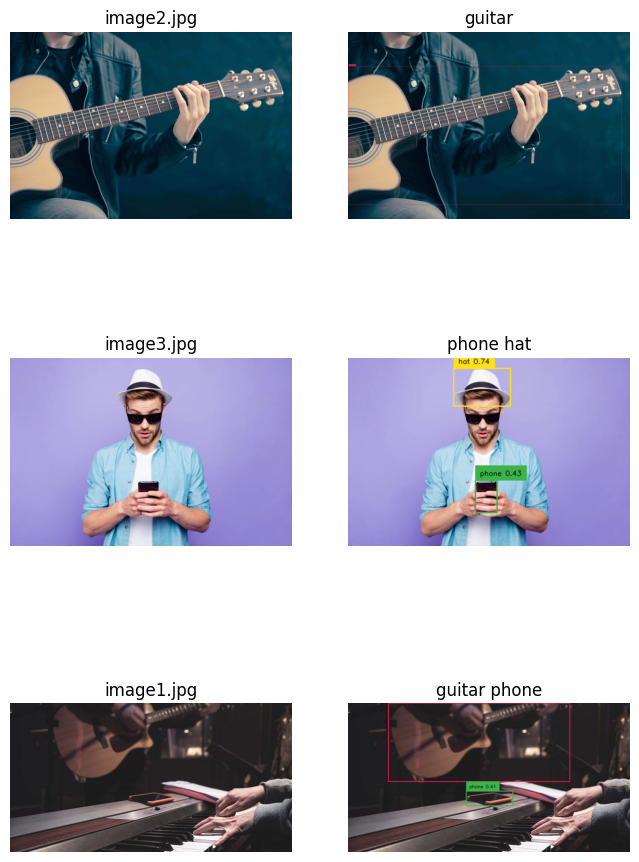

In [7]:
groundingsam.annotate_images()

  0%|          | 0/3 [00:00<?, ?it/s]

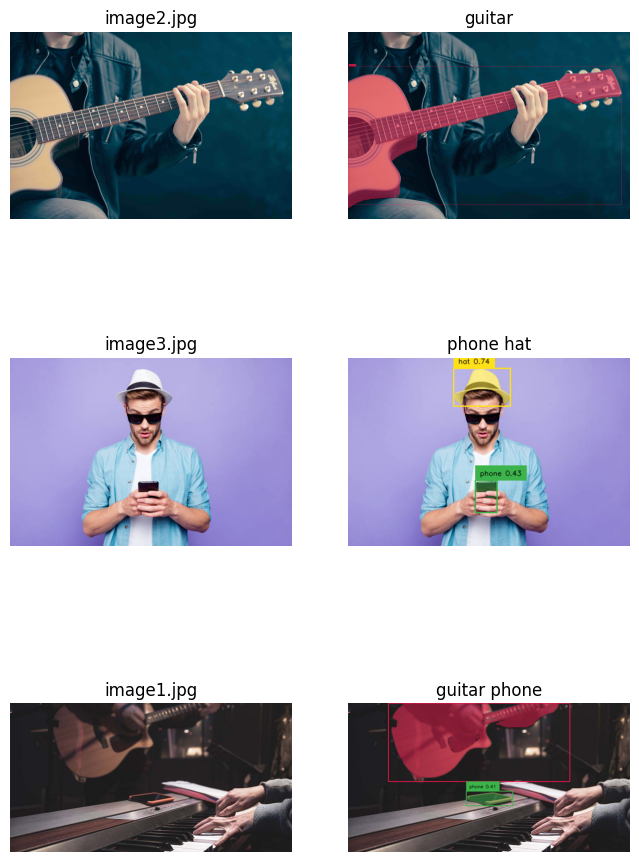

In [8]:
groundingsam.get_masks()

_______
## **2. SEGMAVISONPRO - GroundingSAM**

The Prompt Generator integrates two powerful models—BLIP and ViT-GPT2—to generate highly descriptive image captions:

> BLIP (Bootstrapped Language-Image Pretraining) excels at generating rich, context-aware prompts based on visual inputs, making it ideal for diverse image understanding tasks.

> ViT-GPT2 (Vision Transformer combined with GPT-2) further enhances the system by leveraging powerful transformer-based architectures to generate detailed captions from image data. Together, these models provide a robust solution for generating high-quality, context-relevant prompts, suitable for various image analysis and captioning needs.








In [9]:
from segmaVisionPro.promptutils.generator import PromptGenerator, Synchronizer

In [10]:
synchronizer = Synchronizer(detection_data)

In [11]:
prompt_generator=PromptGenerator(image_directory='/content/segmaVisionPro/data')

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.2"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [12]:
synchronizer.sync_with_prompt_generator(prompt_generator)

In [13]:
prompt_pool=prompt_generator.generate_prompts()

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


___________
## **3. SEGMAVISONPRO - Prompt Analyzer**

Process prompts to determine the best ones based on readability, complexity criteria, or relevance. This method processes each set of prompts associated with an image by:
> Calculating similarity between prompts and optionally removing similar prompts.

> Evaluating prompts based on the specified complexity criterion, readability, or relevance.

> Sorting the prompts based on the chosen criterion.

> Selecting the top three prompts for each image.

In [15]:
from segmaVisionPro.promptutils.analyzer import PromptAnalyzer

In [18]:
prompt_analyzer=PromptAnalyzer(prompt_pool)

In [20]:
%cd /content
prompt_analyzer.process_prompts(complexity_criterion="parse_tree_depth")

/content
Not enough similar prompts to remove items according to threshold.
Returning original prompts list.
Not enough similar prompts to remove items according to threshold.
Returning original prompts list.
Not enough similar prompts to remove items according to threshold.
Returning original prompts list.
Results saved to 'prompt_results.json'
